In [ ]:
import numpy as np
import pandas as pd
#Libraries for data visualization
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/NCKH_dachuanhoa.xlsx")
df.head()

,Timestamp,Cau1,Cau2,Cau3,Cau4,Cau5,Cau6,Cau7,Cau8,Cau9,...,Cau29,Cau30,Cau31,Cau32,Cau33,Cau34,Cau35,Cau36,Cau37,Cau37*
0,2023-06-28 21:19:59.112,Nữ,Thanh Hóa,2003.0,Năm 2,Đại học Công nghệ TP.HCM (HUTECH),Khoa học tự nhiên,Công nghệ Thông tin,3,1,...,3,3,3,3,3,1,3,3,"ngu bỏ mẹ, đếch hiểu ý của câu hỏi",ChatGPT là ngừoi bạn thân thiện giúp chúng ta ...
1,2023-06-28 21:31:38.752,Nam,Ninh Thuận,2001.0,Năm 4,Đại học Công nghệ TP.HCM (HUTECH),Công nghệ - kỹ thuật,Công nghệ Thông tin,3,1,...,5,5,4,5,4,2,4,5,Tốt,Giúp đỡ nhiều hơn
2,2023-06-28 21:45:53.565,Nam,Thanh Hóa,2003.0,Năm 2,Đại học Công nghệ TP.HCM (HUTECH),Khoa học tự nhiên,Khoa học dữ liệu,2,1,...,5,5,4,1,4,3,5,4,Không có ý kiến gì,Tôi nghĩ nó khá tiện ích cho tôi trong việc h...
3,2023-06-28 21:54:35.957,Nam,Thừa Thiên Huế,2003.0,Năm 2,Đại học Công nghệ TP.HCM (HUTECH),Công nghệ - kỹ thuật,Công nghệ Thông tin,0,1,...,3,4,3,3,3,3,5,5,Tốt,Tốt
4,2023-06-28 21:58:06.748,Nam,Hồ Chí Minh,2003.0,Năm 2,Đại học FPT (FPT),Công nghệ - kỹ thuật,Ngôn ngữ Anh,3,1,...,3,3,3,3,3,3,3,3,Cũng ok,Ok


In [ ]:
# Nếu độ chính xác thấp thì sử dụng XGB

df.columns

Index(['Timestamp', 'Cau1', 'Cau2', 'Cau3', 'Cau4', 'Cau5', 'Cau6', 'Cau7',
       'Cau8', 'Cau9', 'Cau10', 'Cau11', 'Cau12', 'Cau13', 'Cau14'', 'Cau14',
       'Cau15', 'Cau16', 'cau17', 'Cau18', 'Cau19', 'Cau20', 'Cau21', 'Cau22',
       'Cau23', 'Cau24', 'Cau24*', 'Cau25', 'Cau26', 'Cau27', 'Cau28', 'Cau29',
       'Cau30', 'Cau31', 'Cau32', 'Cau33', 'Cau34', 'Cau35', 'Cau36', 'Cau37',
       'Cau37*'],
      dtype='object')

In [ ]:
# X = df.loc[ "Cau19", "Cau24*", 'Cau25' ,'Cau31'] # Feature

columns_to_select = ["Cau11","Cau12" ,"Cau18",'Cau21', 'Cau22', 'Cau23', 'Cau24', 'Cau27', 'Cau28', 'Cau29', 'Cau30']

# ,"Cau24*", 'Cau26'
X = df[columns_to_select].copy()
y = df["Cau14'"].copy() # Target

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
X.columns

Index(['Cau11', 'Cau12', 'Cau18', 'Cau21', 'Cau22', 'Cau23', 'Cau24', 'Cau27',
       'Cau28', 'Cau29', 'Cau30'],
      dtype='object')

In [ ]:
y.value_counts()

1    293
3    255
2    208
4    101
Name: Cau14', dtype: int64

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=20)

# Xem dữ liệu có dạng như thế nào khi chia theo 0.2

In [ ]:
y_train.value_counts()

1    231
3    207
2    166
4     81
Name: Cau14', dtype: int64

In [ ]:
y_test.value_counts()

1    62
3    48
2    42
4    20
Name: Cau14', dtype: int64

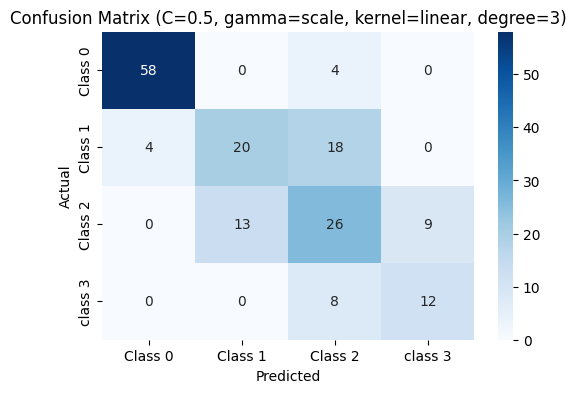

Accuracy: 0.6744186046511628


In [ ]:
# Import necessary libraries
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
param = {'C': 0.5, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
model =  svm.SVC( **param)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# # Create a svm Classifier
# for param in params:
#     clf = svm.SVC(C=param["C"], gamma=param["gamma"], kernel=param["kernel"], degree=param["degree"])  # Linear Kernel

#     # Train the model using the training sets
#     clf.fit(X_train, y_train)

#     # Predict the response for the test dataset
#     y_pred = clf.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1", "Class 2", "class 3"],
            yticklabels=["Class 0", "Class 1", "Class 2", "class 3"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (C={param['C']}, gamma={param['gamma']}, kernel={param['kernel']}, degree={param['degree']})")
plt.show()
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
#     print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


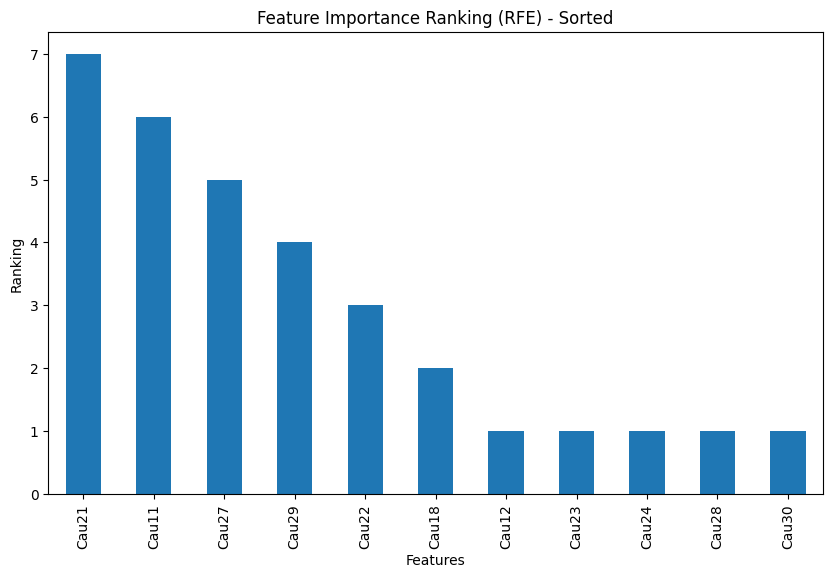

In [ ]:
from sklearn.feature_selection import RFE
import pandas as pd
import matplotlib.pyplot as plt

# Tạo model của bạn (ở đây là model của SVM)


# Sử dụng RFE để đánh giá tầm quan trọng của các đặc trưng
rfe = RFE(estimator=model)
svm_rfe_model_fit = rfe.fit(X_train, y_train)

# Lấy chỉ số của các đặc trưng được chọn
selected_features = pd.Series(data=svm_rfe_model_fit.ranking_, index=X_train.columns)

# Chọn chỉ các đặc trưng có rank bằng 1
signi_feat_rfe = selected_features[selected_features == 1].index

# Sắp xếp chỉ số của các đặc trưng được chọn theo rank
sorted_features = selected_features.sort_values(ascending=False)

# Vẽ biểu đồ tầm quan trọng của các đặc trưng sau khi sử dụng RFE (đã sắp xếp)
plt.figure(figsize=(10, 6))
sorted_features.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Ranking')
plt.title('Feature Importance Ranking (RFE) - Sorted')
plt.show()



# Cho model có kernel là poly

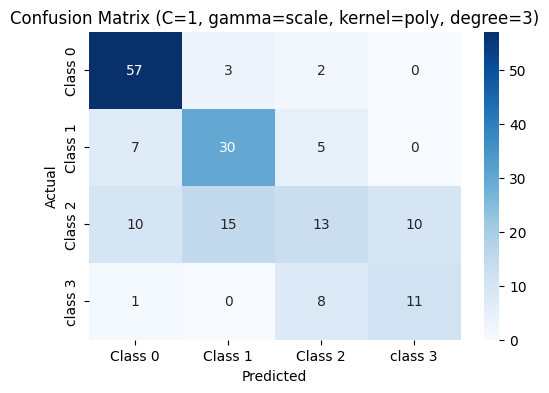

Accuracy: 0.6453488372093024


In [ ]:
# Import necessary libraries
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
param = {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
model =  svm.SVC( **param)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# # Create a svm Classifier
# for param in params:
#     clf = svm.SVC(C=param["C"], gamma=param["gamma"], kernel=param["kernel"], degree=param["degree"])  # Linear Kernel

#     # Train the model using the training sets
#     clf.fit(X_train, y_train)

#     # Predict the response for the test dataset
#     y_pred = clf.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1", "Class 2", "class 3"],
            yticklabels=["Class 0", "Class 1", "Class 2", "class 3"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (C={param['C']}, gamma={param['gamma']}, kernel={param['kernel']}, degree={param['degree']})")
plt.show()
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
#     print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


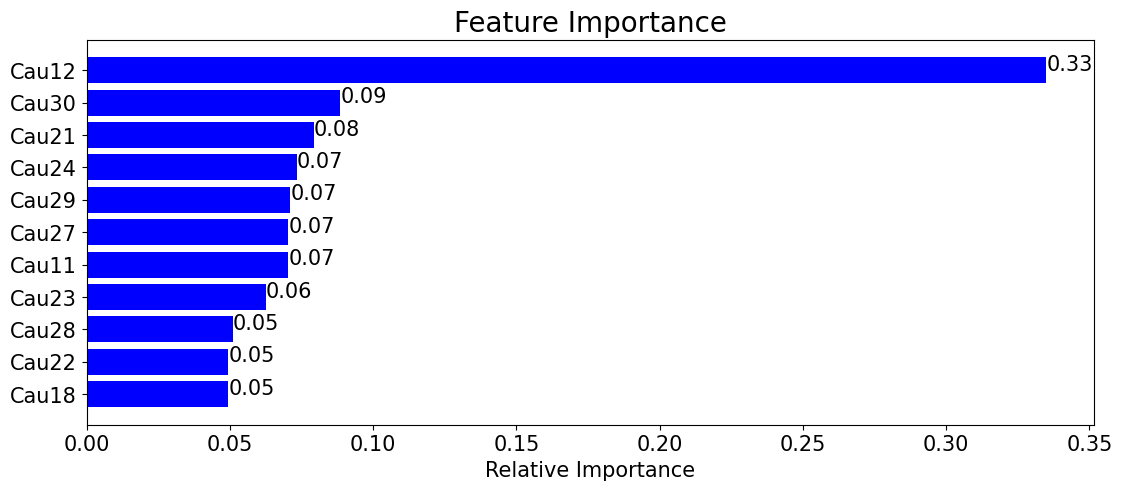

In [ ]:
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt


perm_importance = permutation_importance(model, X_train, y_train)

# Making the sum of feature importance being equal to 1.0,
# so feature importance can be understood as percentage
perm_importance_normalized = perm_importance.importances_mean/perm_importance.importances_mean.sum()

# Feature's name (considering your X a DataFrame)
feature_names = X.columns
features = np.array(feature_names)

# Sort to plot in order of importance
sorted_idx = perm_importance_normalized.argsort()

# Plotting
plt.figure(figsize=(13,5))
plt.title('Feature Importance',fontsize=20)
plt.barh(features[sorted_idx], perm_importance_normalized[sorted_idx], color='b', align='center')
plt.xlabel('Relative Importance', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
for index, value in enumerate(perm_importance_normalized[sorted_idx]):
    plt.text(value, index,
             str(round(value,2)), fontsize=15)

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_column_charts(df, column_name):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    # Biểu đồ tròn
    df[column_name].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=axes[0])
    axes[0].set_title(f'Pie Chart for {column_name}')

    # Biểu đồ cột
    sns.countplot(x=column_name, data=df, palette='viridis', ax=axes[1])
    axes[1].set_title(f'Column Chart for {column_name}')

    plt.tight_layout()
    plt.show()

# Ví dụ sử dụng:
# # Thay 'TenCot' bằng tên cột bạn muốn vẽ
# plot_column_charts(df, 'TenCot')
def view_data(df, name):
  for i in range(1,5):
    df_12 = df[df["Cau14'"]==i]
    plot_column_charts(df_12, name)


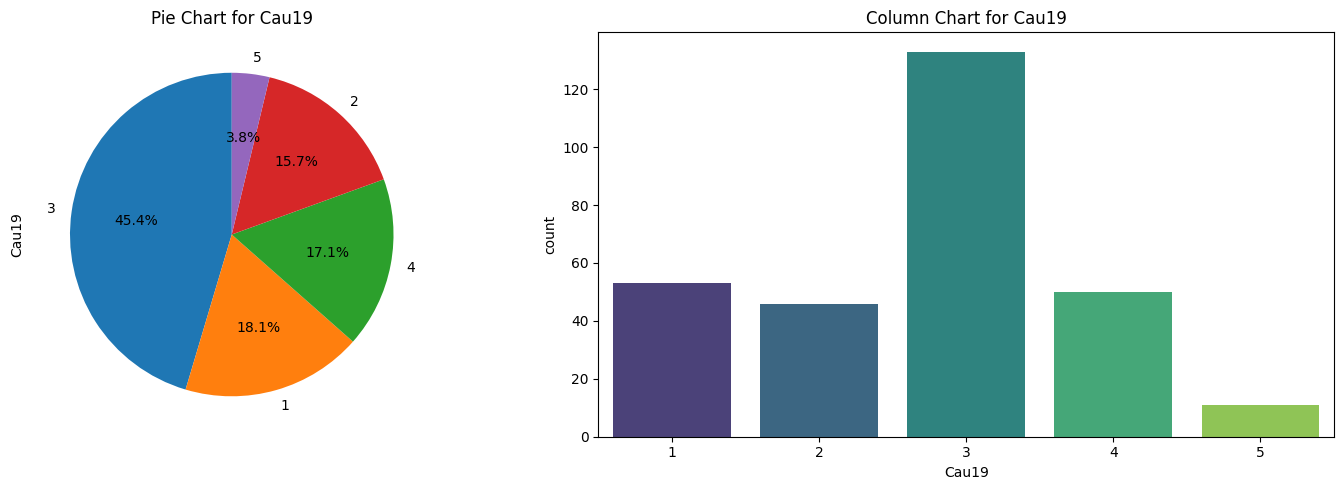

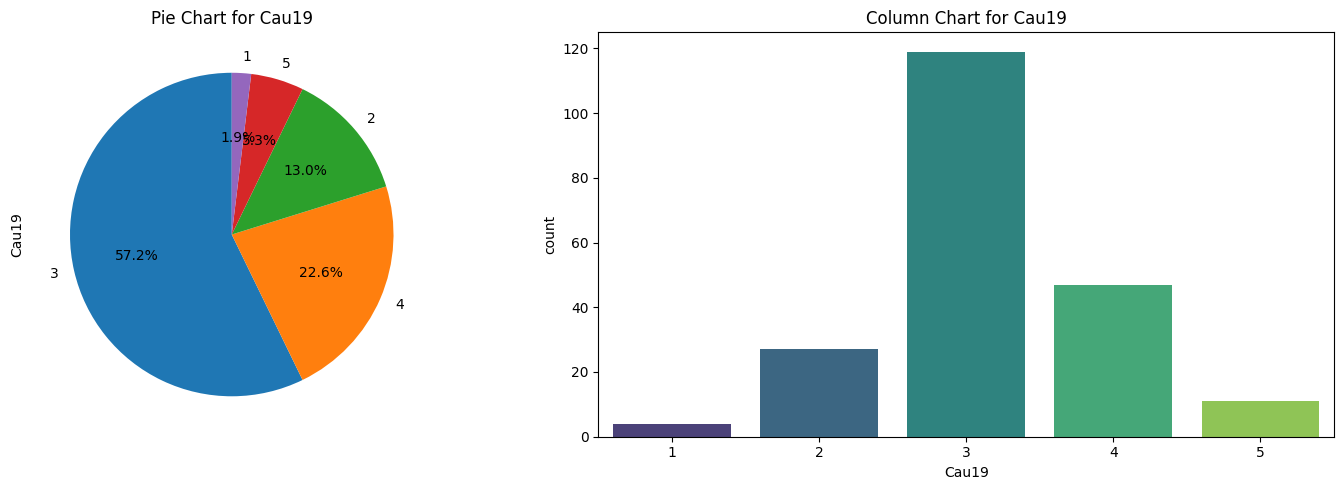

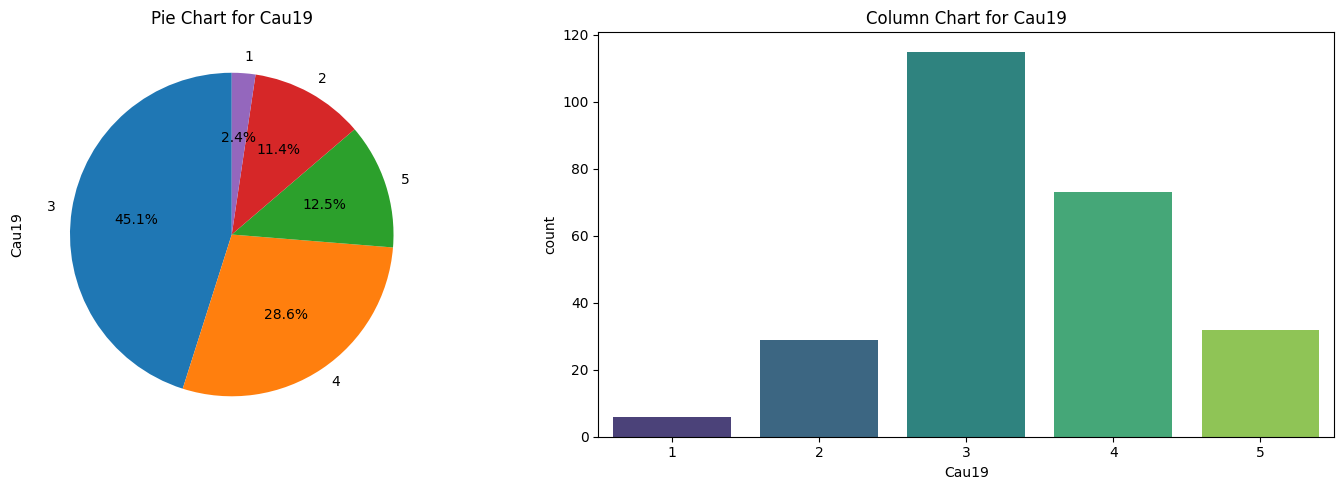

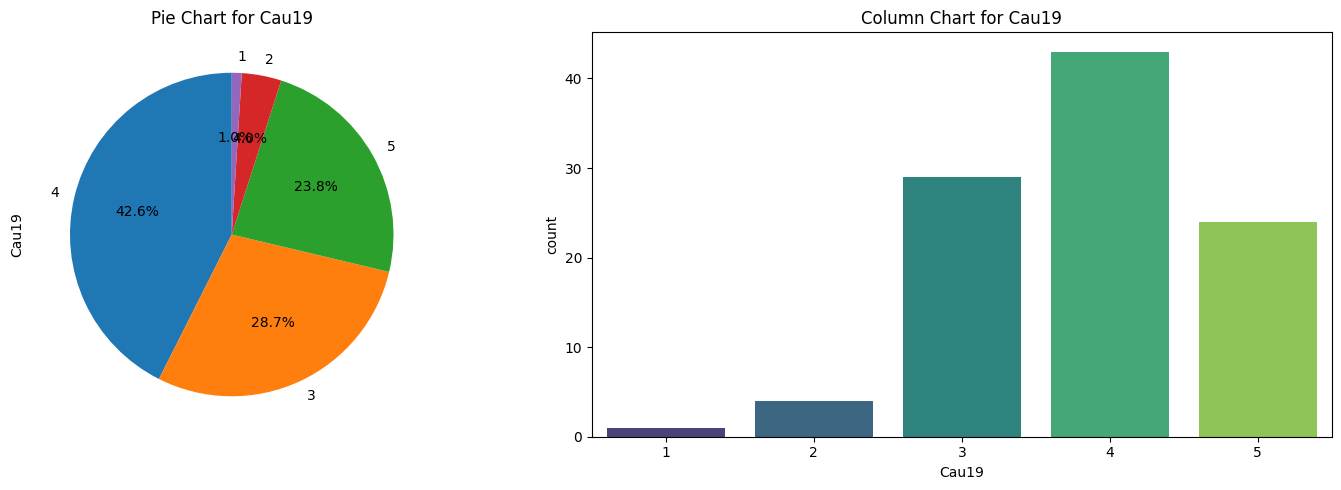

In [ ]:
# [ "Cau19", "Cau24*", 'Cau25' ,'Cau31']
view_data(df, "Cau19")

In [ ]:
len(df)

857

In [ ]:
import pandas as pd
def delete_noise_threshold( df_name):
  for column in df_name.columns:
    if column != "Cau14'":
      value_counts = df_name[column].value_counts(normalize=True)
      # Xác định và loại bỏ giá trị nhiễu dựa trên phân phối xác suất của feature
      threshold = 0.05
      noise_values = value_counts[value_counts < threshold].index
      df_name = df_name[~df_name[column].isin(noise_values)]
  return df_name



def delete_noise(df):
  df_n = []
  for i in range(1,5):
    df_name = df[df["Cau14'"]== i]
    df_name = delete_noise_threshold(df_name)
    df_n.append(df_name)
  return df_n



df_1 = df[["Cau11","Cau12" ,"Cau14'", "Cau18",'Cau21', 'Cau22', 'Cau23', 'Cau24', 'Cau27', 'Cau28', 'Cau29', 'Cau30']].copy()
df_n = delete_noise(df_1)

n = len(df_n[0]) + len(df_n[1])+ len(df_n[2])+ len(df_n[3])
print(n)

662


In [ ]:
print(len(df_n[0]))
print(len(df_n[1]))

print( len(df_n[2]))
print( len(df_n[3]))



224
135
227
76


In [ ]:
df["Cau14'"].value_counts()

1    293
3    255
2    208
4    101
Name: Cau14', dtype: int64

In [ ]:
import pandas as pd
from sklearn.utils import shuffle

def concat_and_shuffle(dataframes):
    # Hợp toàn bộ dữ liệu từ danh sách DataFrame
    concatenated_df = pd.concat(dataframes, ignore_index=True)

    # Xáo trộn dữ liệu
    shuffled_df = shuffle(concatenated_df).reset_index(drop=True)

    return shuffled_df

# Example usage:
# df_n là danh sách các DataFrame
df_combined = concat_and_shuffle(df_n)


In [ ]:
columns_to_select = ["Cau11" ,"Cau12","Cau18",'Cau21', 'Cau22', 'Cau23', 'Cau24', 'Cau27', 'Cau28', 'Cau29', 'Cau30']

# ,"Cau24*", 'Cau26'
X = df_combined[columns_to_select].copy()
y = df_combined["Cau14'"].copy() # Target
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10)

In [ ]:
# df_combined.to_csv("data svm delete noise.csv")

In [ ]:
y_train.value_counts()

1    190
3    178
2    102
4     59
Name: Cau14', dtype: int64

In [ ]:
y_test.value_counts()

3    49
1    34
2    33
4    17
Name: Cau14', dtype: int64

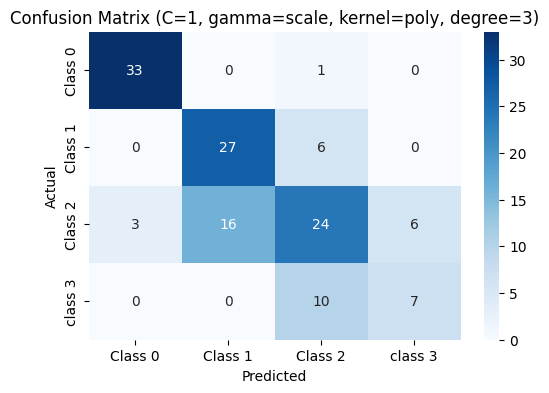

Accuracy: 0.6842105263157895


In [ ]:
# Import necessary libraries
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
param = {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
model =  svm.SVC( **param)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# # Create a svm Classifier
# for param in params:
#     clf = svm.SVC(C=param["C"], gamma=param["gamma"], kernel=param["kernel"], degree=param["degree"])  # Linear Kernel

#     # Train the model using the training sets
#     clf.fit(X_train, y_train)

#     # Predict the response for the test dataset
#     y_pred = clf.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1", "Class 2", "class 3"],
            yticklabels=["Class 0", "Class 1", "Class 2", "class 3"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (C={param['C']}, gamma={param['gamma']}, kernel={param['kernel']}, degree={param['degree']})")
plt.show()
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
#     print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


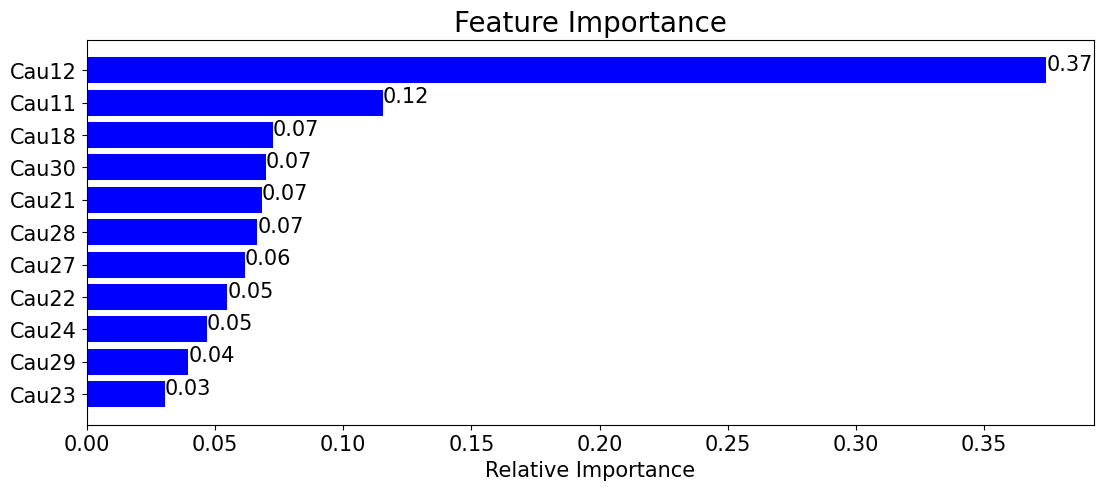

In [ ]:
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt


perm_importance = permutation_importance(model, X_train, y_train)

# Making the sum of feature importance being equal to 1.0,
# so feature importance can be understood as percentage
perm_importance_normalized = perm_importance.importances_mean/perm_importance.importances_mean.sum()

# Feature's name (considering your X a DataFrame)
feature_names = X.columns
features = np.array(feature_names)

# Sort to plot in order of importance
sorted_idx = perm_importance_normalized.argsort()

# Plotting
plt.figure(figsize=(13,5))
plt.title('Feature Importance',fontsize=20)
plt.barh(features[sorted_idx], perm_importance_normalized[sorted_idx], color='b', align='center')
plt.xlabel('Relative Importance', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
for index, value in enumerate(perm_importance_normalized[sorted_idx]):
    plt.text(value, index,
             str(round(value,2)), fontsize=15)

plt.show()


In [ ]:
import numpy as np
import pandas as pd

# Giả sử bạn có một danh sách các DataFrame df_list, mỗi DataFrame tương ứng với một nhãn

# Số lượng dữ liệu mới bạn muốn tạo
num_new_samples = 1000

# Mảng để lưu trữ dữ liệu mới
new_data_list = []

# Duyệt qua từng nhãn
for df_label in df_n:
    # Duyệt qua từng feature của mỗi nhãn
    new_data = pd.DataFrame()
    for feature in df_label.columns:
        if feature != "Cau14'":
          # Tính toán các tham số của phân phối (mean và standard deviation)
          mean_feature = df_label[feature].mean()
          std_dev_feature = df_label[feature].std()

          # Tạo dữ liệu mới cho từng feature dựa trên phân phối xác suất của feature hiện có
          new_samples_feature = np.random.normal(loc=mean_feature, scale=std_dev_feature, size=num_new_samples)

          # Thêm feature mới vào DataFrame mới
          new_data[feature] = new_samples_feature

    # Thêm DataFrame mới vào danh sách
    new_data_list.append(new_data)

# new_data_list chứa các DataFrame mới, mỗi DataFrame có dữ liệu mới cho mỗi nhãn và feature tương ứng


In [ ]:
new_data_list[0]

,Cau11,Cau12,Cau18,Cau21,Cau22,Cau23,Cau24,Cau27,Cau28,Cau29,Cau30
0,1.743992,1.299281,2.484532,1.518466,4.121450,2.611997,0.555826,0.024768,3.052405,3.223688,2.038034
1,1.437615,1.459840,2.874602,2.269672,2.742549,4.023813,3.292035,1.164157,2.526036,4.138521,3.917352
2,1.664183,1.300792,1.133120,1.268674,2.702556,2.566079,4.460832,0.753493,1.011297,3.243674,2.169989
3,0.706105,0.833375,2.725074,3.174085,3.529637,3.108413,3.429882,1.161886,2.470093,2.058877,1.962646
4,1.837263,0.788528,2.132528,2.799344,3.795232,1.394946,1.002187,2.769487,2.273869,1.340968,0.227743
...,...,...,...,...,...,...,...,...,...,...,...
995,0.678929,0.946364,2.597511,3.062001,3.030019,1.414668,2.351529,2.559495,1.996081,3.932554,2.085482
996,1.573853,1.872379,3.873222,2.196752,3.943231,2.008424,4.174627,0.574663,1.121619,3.748735,2.754303
997,0.922975,1.255753,1.114417,1.579425,2.714625,2.852230,3.133404,0.997275,2.136747,2.957065,1.826215
998,2.602646,0.326167,4.185178,3.514589,4.289229,0.964578,3.006419,2.095497,4.719302,3.237902,1.621810


In [ ]:
new_data_list[0]["Cau14'"]=1
new_data_list[1]["Cau14'"]=2
new_data_list[2]["Cau14'"]=3
new_data_list[3]["Cau14'"]=4

In [ ]:
new_df= concat_and_shuffle(new_data_list)

In [ ]:
new_df.to_csv("data sampling gpt.csv")

In [ ]:
combined_df = pd.concat([df_combined, new_df], ignore_index=True)

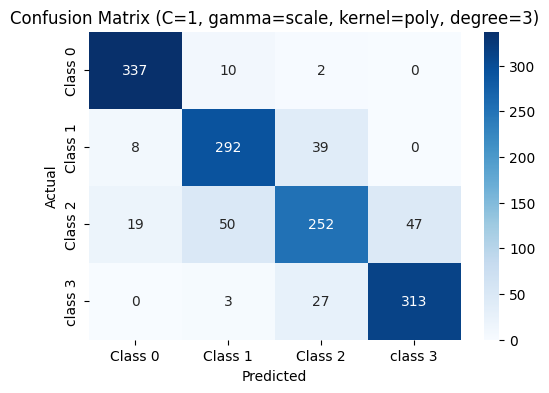

Accuracy: 0.8534667619728378


In [ ]:
columns_to_select = ["Cau11" ,"Cau12","Cau18",'Cau21', 'Cau22', 'Cau23', 'Cau24', 'Cau27', 'Cau28', 'Cau29', 'Cau30']

# ,"Cau24*", 'Cau26'
X = combined_df[columns_to_select].copy()
y = combined_df["Cau14'"].copy() # Target
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)

# Import necessary libraries
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
param = {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
model =  svm.SVC( **param)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# # Create a svm Classifier
# for param in params:
#     clf = svm.SVC(C=param["C"], gamma=param["gamma"], kernel=param["kernel"], degree=param["degree"])  # Linear Kernel

#     # Train the model using the training sets
#     clf.fit(X_train, y_train)

#     # Predict the response for the test dataset
#     y_pred = clf.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1", "Class 2", "class 3"],
            yticklabels=["Class 0", "Class 1", "Class 2", "class 3"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (C={param['C']}, gamma={param['gamma']}, kernel={param['kernel']}, degree={param['degree']})")
plt.show()
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
#     print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


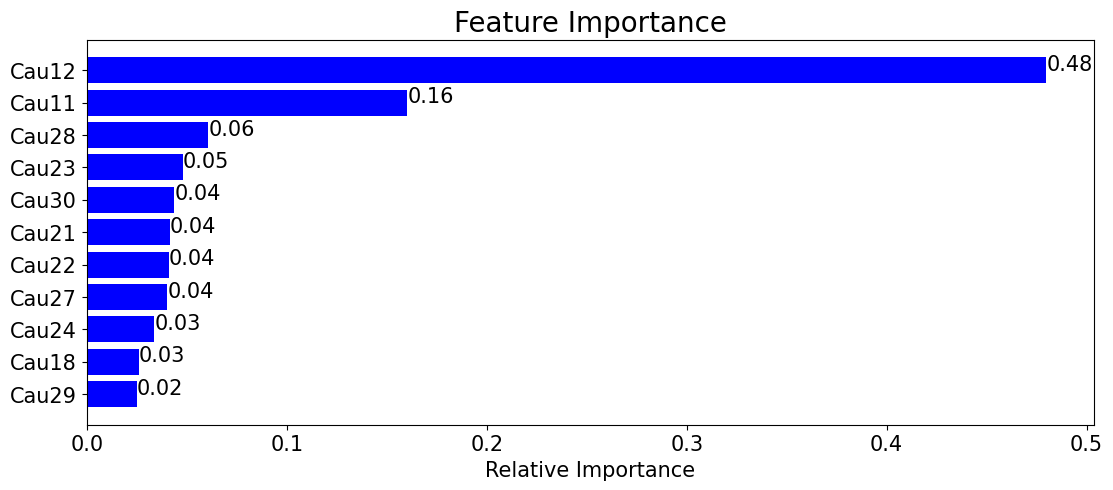

In [ ]:
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt


perm_importance = permutation_importance(model, X_train, y_train)

# Making the sum of feature importance being equal to 1.0,
# so feature importance can be understood as percentage
perm_importance_normalized = perm_importance.importances_mean/perm_importance.importances_mean.sum()

# Feature's name (considering your X a DataFrame)
feature_names = X.columns
features = np.array(feature_names)

# Sort to plot in order of importance
sorted_idx = perm_importance_normalized.argsort()

# Plotting
plt.figure(figsize=(13,5))
plt.title('Feature Importance',fontsize=20)
plt.barh(features[sorted_idx], perm_importance_normalized[sorted_idx], color='b', align='center')
plt.xlabel('Relative Importance', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
for index, value in enumerate(perm_importance_normalized[sorted_idx]):
    plt.text(value, index,
             str(round(value,2)), fontsize=15)

plt.show()


Gộp lại hai cột với nhau ví dụ  như feature 1 có nhãn là [1,2,3,4,5]
feature 2 có nhãn là [1,2,3,4,5]

<ipython-input-74-364e581b4650>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Cau12'] = selected_data['Cau12'].replace(label_mapping)
<ipython-input-74-364e581b4650>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Cau12'] = pd.Categorical(selected_data['Cau12'], categories=order_list, ordered=True)


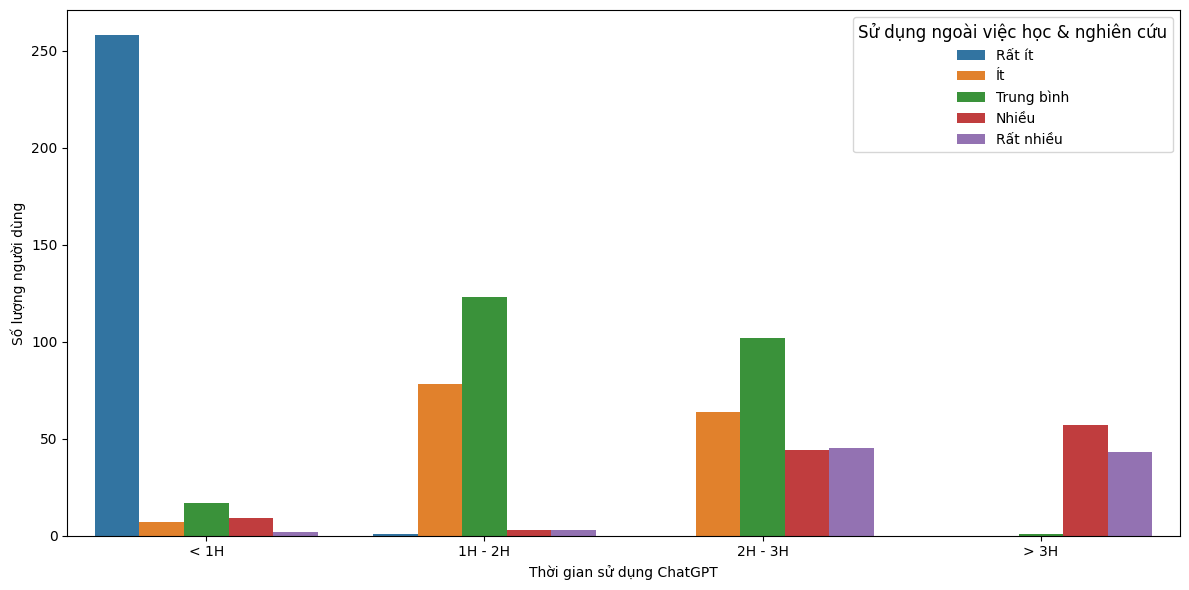

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

categories = ['< 1H', '1H - 2H', '2H - 3H', '> 3H']

# Lấy dữ liệu từ cột 'Cau12' và 'Cau14'
selected_columns = ['Cau12', "Cau14'"]
selected_data = df[selected_columns]

# Ánh xạ giữa giá trị hiện tại và nhãn mới cho Cau12
label_mapping = {
    1: 'Rất ít',
    2: 'Ít',
    3: 'Trung bình',
    4: 'Nhiều',
    5: 'Rất nhiều'
}

# Tạo một danh sách thứ tự tương ứng
order_list = ['Rất ít', 'Ít', 'Trung bình', 'Nhiều', 'Rất nhiều']

# Áp dụng ánh xạ và đặt kiểu dữ liệu
selected_data['Cau12'] = selected_data['Cau12'].replace(label_mapping)
selected_data['Cau12'] = pd.Categorical(selected_data['Cau12'], categories=order_list, ordered=True)

by_country = selected_data.groupby(['Cau12', "Cau14'"]).size().reset_index(name='n')

total_by_country = by_country.groupby('Cau12')['n'].sum().reset_index(name='total')

top_countries = total_by_country.nlargest(15, 'total')

by_country_top = by_country[by_country['Cau12'].isin(top_countries['Cau12'])]

# Thống kê dữ liệu
data_counts = selected_data.melt(var_name='Question', value_name='Response').groupby(['Question', 'Response']).size().reset_index(name='Count')

# Vẽ biểu đồ bằng seaborn và gán đối tượng Axes cho biến ax
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Cau14'", y='n', hue='Cau12', data=by_country_top, dodge=True)

# Thay đổi tên của x-axis và labels của legend
ax.set_xticklabels(categories)
ax.legend(title='Sử dụng ngoài việc học & nghiên cứu', title_fontsize=12, loc='upper right')
plt.xlabel('Thời gian sử dụng ChatGPT')
plt.ylabel('Số lượng người dùng')

plt.tight_layout()
plt.show()

<ipython-input-75-5a9c1d2ea567>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Cau11'] = selected_data['Cau11'].replace(label_mapping)
<ipython-input-75-5a9c1d2ea567>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Cau11'] = pd.Categorical(selected_data['Cau11'], categories=order_list, ordered=True)


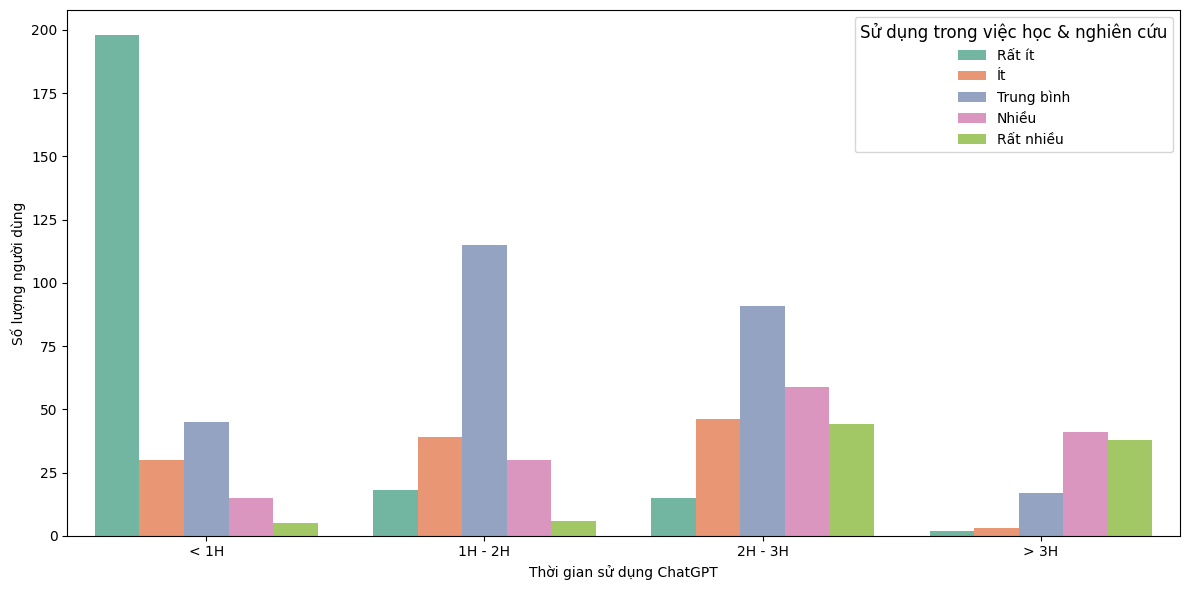

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

categories = ['< 1H', '1H - 2H', '2H - 3H', '> 3H']

# Lấy dữ liệu từ cột 'Cau11' và 'Cau14'
selected_columns = ['Cau11', "Cau14'"]
selected_data = df[selected_columns]

# Ánh xạ giữa giá trị hiện tại và nhãn mới cho Cau11
label_mapping = {
    1: 'Rất ít',
    2: 'Ít',
    3: 'Trung bình',
    4: 'Nhiều',
    5: 'Rất nhiều'
}

# Tạo một danh sách thứ tự tương ứng
order_list = ['Rất ít', 'Ít', 'Trung bình', 'Nhiều', 'Rất nhiều']

# Áp dụng ánh xạ và đặt kiểu dữ liệu
selected_data['Cau11'] = selected_data['Cau11'].replace(label_mapping)
selected_data['Cau11'] = pd.Categorical(selected_data['Cau11'], categories=order_list, ordered=True)

by_country = selected_data.groupby(['Cau11', "Cau14'"]).size().reset_index(name='n')

total_by_country = by_country.groupby('Cau11')['n'].sum().reset_index(name='total')

top_countries = total_by_country.nlargest(15, 'total')

by_country_top = by_country[by_country['Cau11'].isin(top_countries['Cau11'])]

# Thống kê dữ liệu
data_counts = selected_data.melt(var_name='Question', value_name='Response').groupby(['Question', 'Response']).size().reset_index(name='Count')

# Vẽ biểu đồ bằng seaborn và gán đối tượng Axes cho biến ax
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Cau14'", y='n', hue='Cau11', data=by_country_top, dodge=True, palette="Set2")

# Thay đổi tên của x-axis và labels của legend
ax.set_xticklabels(categories)
ax.legend(title='Sử dụng trong việc học & nghiên cứu', title_fontsize=12, loc='upper right')
plt.xlabel('Thời gian sử dụng ChatGPT')
plt.ylabel('Số lượng người dùng')

plt.tight_layout()
plt.show()